# Dataset Reduction

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mbarbetti/lymphoma-classification/blob/master/2_dataset_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mbarbetti/lymphoma-classification/blob/master/2_dataset_reduction.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [15]:
import os
import pickle
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu

data_dir  = "./data"
data_file = "db_mediastinalbulky_pruned.pkl"
file_path = os.path.join ( data_dir, data_file )

with open (file_path, "rb") as file:
  data = pickle.load (file)

## Correlation studies

### Correlated to SUV_midpoint

In [16]:
feats_to_test = [
  "CONVENTIONAL_SUVbwmidpoint", "CONVENTIONAL_SUVbwmean", "CONVENTIONAL_SUVbwstd", 
  "CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)", "CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)"
]

corr_matrix = data[feats_to_test].corr()

corr_matrix["CONVENTIONAL_SUVbwmidpoint"] . sort_values ( ascending = False )

CONVENTIONAL_SUVbwmidpoint                                     1.000000
CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)    0.978418
CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)      0.955928
CONVENTIONAL_SUVbwstd                                          0.933491
CONVENTIONAL_SUVbwmean                                         0.878995
Name: CONVENTIONAL_SUVbwmidpoint, dtype: float64

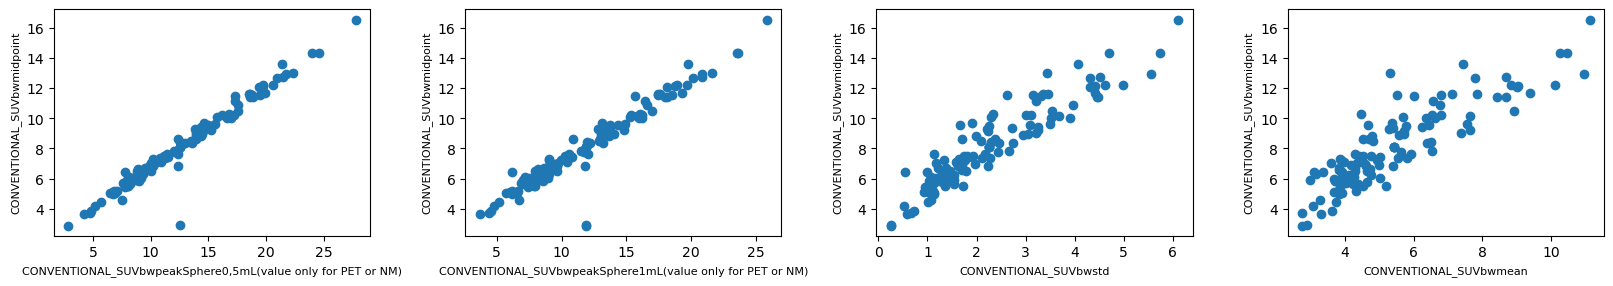

In [17]:
fig, ax = plt.subplots (nrows = 1, ncols = 4, figsize = (20,3), dpi = 100)
plt.subplots_adjust (wspace = 0.3)

for i, label in enumerate (["CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)", 
                            "CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)", 
                            "CONVENTIONAL_SUVbwstd", "CONVENTIONAL_SUVbwmean"]):
  ax[i].set_xlabel ( label, fontsize = 8 )
  ax[i].set_ylabel ( "CONVENTIONAL_SUVbwmidpoint", fontsize = 8 )
  ax[i].scatter ( data[label], data["CONVENTIONAL_SUVbwmidpoint"] )

plt.show()

### Correlated to SUV_mean

In [18]:
feats_to_test = [
  "CONVENTIONAL_SUVbwmean", "CONVENTIONAL_SUVbwstd", 
  "CONVENTIONAL_SUVbwQ1", "CONVENTIONAL_SUVbwQ2", "CONVENTIONAL_SUVbwQ3"
]

corr_matrix = data[feats_to_test].corr()

corr_matrix["CONVENTIONAL_SUVbwmean"] . sort_values ( ascending = False )

CONVENTIONAL_SUVbwmean    1.000000
CONVENTIONAL_SUVbwQ3      0.995940
CONVENTIONAL_SUVbwQ2      0.983085
CONVENTIONAL_SUVbwstd     0.959073
CONVENTIONAL_SUVbwQ1      0.922985
Name: CONVENTIONAL_SUVbwmean, dtype: float64

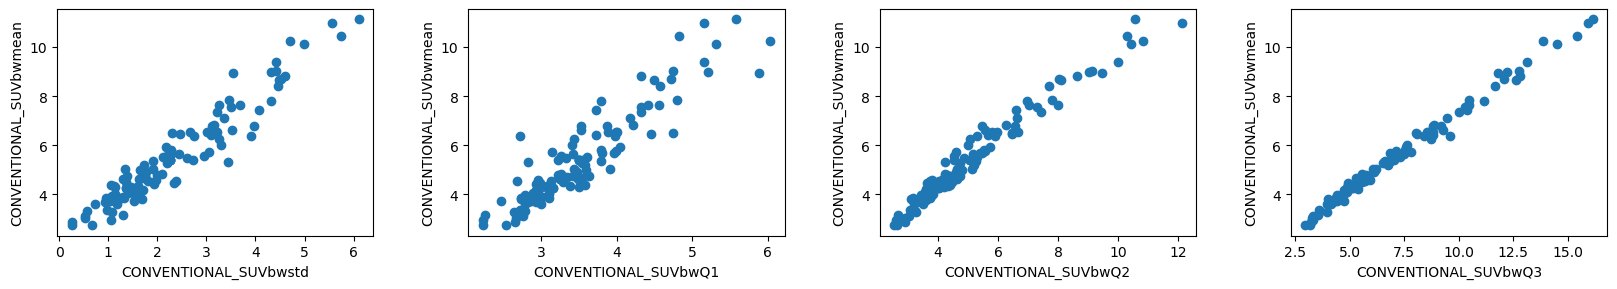

In [19]:
fig, ax = plt.subplots (nrows = 1, ncols = 4, figsize = (20,3), dpi = 100)
plt.subplots_adjust (wspace = 0.3)

for i, label in enumerate (["CONVENTIONAL_SUVbwstd", "CONVENTIONAL_SUVbwQ1", "CONVENTIONAL_SUVbwQ2", "CONVENTIONAL_SUVbwQ3"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  ax[i].set_ylabel ( "CONVENTIONAL_SUVbwmean", fontsize = 10 )
  ax[i].scatter ( data[label], data["CONVENTIONAL_SUVbwmean"] )

plt.show()

### Correlated to TLG

In [20]:
feats_to_test = [
  "CONVENTIONAL_TLG(mL)[onlyForPETorNM]", "SHAPE_Volume(mL)", 
  "SHAPE_Surface(mm2)[onlyFor3DROI]", "SHAPE_Compacity[onlyFor3DROI]"
]

corr_matrix = data[feats_to_test].corr()

corr_matrix["CONVENTIONAL_TLG(mL)[onlyForPETorNM]"] . sort_values ( ascending = False )

CONVENTIONAL_TLG(mL)[onlyForPETorNM]    1.000000
SHAPE_Volume(mL)                        0.932235
SHAPE_Compacity[onlyFor3DROI]           0.801104
SHAPE_Surface(mm2)[onlyFor3DROI]        0.778178
Name: CONVENTIONAL_TLG(mL)[onlyForPETorNM], dtype: float64

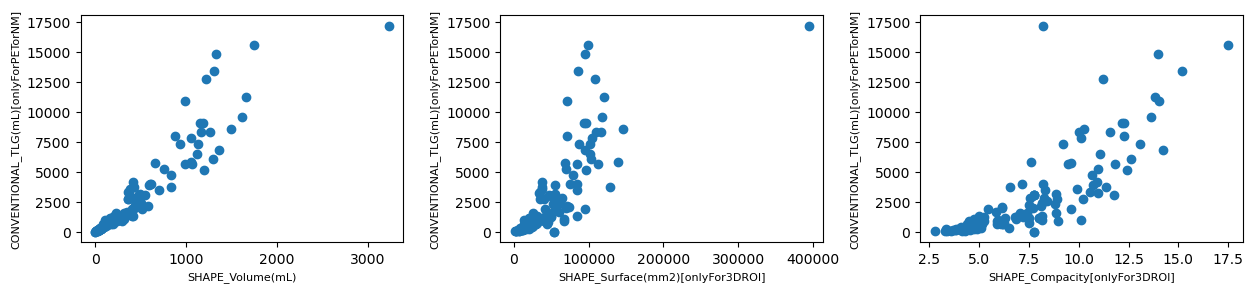

In [21]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)
plt.subplots_adjust (wspace = 0.3)

for i, label in enumerate (["SHAPE_Volume(mL)", "SHAPE_Surface(mm2)[onlyFor3DROI]", "SHAPE_Compacity[onlyFor3DROI]"]):
  ax[i].set_xlabel ( label, fontsize = 8 )
  ax[i].set_ylabel ( "CONVENTIONAL_TLG(mL)[onlyForPETorNM]", fontsize = 8 )
  ax[i].scatter ( data[label], data["CONVENTIONAL_TLG(mL)[onlyForPETorNM]"] )

plt.show()

### Correlated to GLCM_Entropy

In [22]:
feats_to_test = [
  "GLCM_Entropy_log10", "DISCRETIZED_HISTO_Entropy_log10", "DISCRETIZED_HISTO_Energy[=Uniformity]", 
]

corr_matrix = data[feats_to_test].corr()

corr_matrix["GLCM_Entropy_log10"] . sort_values ( ascending = False )

GLCM_Entropy_log10                       1.000000
DISCRETIZED_HISTO_Entropy_log10          0.890514
DISCRETIZED_HISTO_Energy[=Uniformity]   -0.645144
Name: GLCM_Entropy_log10, dtype: float64

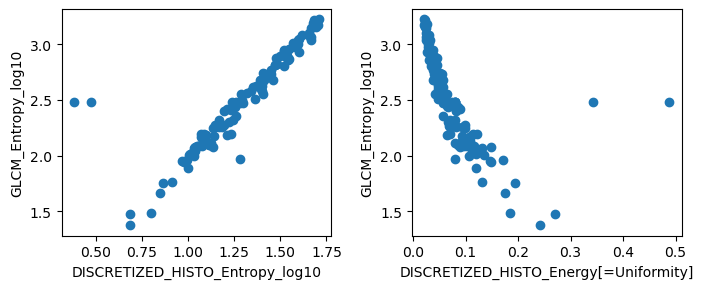

In [23]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)
plt.subplots_adjust (wspace = 0.3)

for i, label in enumerate (["DISCRETIZED_HISTO_Entropy_log10", "DISCRETIZED_HISTO_Energy[=Uniformity]"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  ax[i].set_ylabel ( "GLCM_Entropy_log10", fontsize = 10 )
  ax[i].scatter ( data[label], data["GLCM_Entropy_log10"] )

plt.show()

In [24]:
feats_to_drop = [
  "CONVENTIONAL_SUVbwstd", "CONVENTIONAL_SUVbwQ1", "CONVENTIONAL_SUVbwQ2", 
  "CONVENTIONAL_SUVbwQ3", "CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)",
  "CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)", "DISCRETIZED_HISTO_Entropy_log10",
  "DISCRETIZED_HISTO_Energy[=Uniformity]", "SHAPE_Volume(mL)", "SHAPE_Surface(mm2)[onlyFor3DROI]", 
  "SHAPE_Compacity[onlyFor3DROI]",
]

redu_data = data . copy()
redu_data . drop ( labels = feats_to_drop, axis = 1, inplace = True )

## Discriminatory power

The _discriminatory power_ of two variables is measured through the **Mann-Whitney U test** [[Mann 1947](https://www.jstor.org/stable/2236101?origin=JSTOR-pdf)]. The U test is a non-parametric test of the null hypothesis that the distribution underlying sample $x$ is the same as the distribution underlying sample $y$.

In [25]:
for label in ["age", "SHAPE_Sphericity[onlyFor3DROI])",
              "CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought",
              "CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought"]:
  data_1 = data.query("lymphoma_type==1")[label].to_numpy()
  data_3 = data.query("lymphoma_type==3")[label].to_numpy()
  U_test, p_value = mannwhitneyu ( data_1, data_3, method = "asymptotic" )
  print (f"p-value : {p_value:.4f} - {label}")

p-value : 0.0438 - age
p-value : 0.0275 - SHAPE_Sphericity[onlyFor3DROI])
p-value : 0.2290 - CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought
p-value : 0.2290 - CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought


We decide that a _confidence level_ of 99% is required to reject the null hypothesis in favor of the alternative that the distributions are different.

In [26]:
feats_to_drop = [
  "age", "SHAPE_Sphericity[onlyFor3DROI])",
  "CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought",
  "CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought"
]

redu_data . drop ( labels = feats_to_drop, axis = 1, inplace = True )

## Data export

In [27]:
redu_data = redu_data[
  [
    "ID", "lymphoma_type", "CONVENTIONAL_SUVbwmidpoint", "CONVENTIONAL_SUVbwmean", 
    "CONVENTIONAL_TLG(mL)[onlyForPETorNM]", "CONVENTIONAL_SUVbwSkewness", "CONVENTIONAL_SUVbwKurtosis",
    "GLCM_Homogeneity[=InverseDifference]", "GLCM_Entropy_log10", "GLRLM_SRE", "GLRLM_LRE", "GLZLM_LGZE", "GLZLM_HGZE",
  ]
]

In [14]:
exp_data_file = "db_mediastinalbulky_reduced.pkl"
exp_file_path = os.path.join ( data_dir, exp_data_file )

redu_data . to_pickle ( exp_file_path )